In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

/var/folders/lw/ddpg_lzs43z9_q7md3z6mst80000gn/T/ipykernel_14246/3177754037.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df_train = pd.read_csv('/Users/i_jeong/Downloads/빅리더/kaggle/train.csv')
df_test = pd.read_csv('/Users/i_jeong/Downloads/빅리더/kaggle/test.csv')

In [3]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [4]:
df_train.tail()

,id,date,country,store,product,num_sold
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641
136949,136949,2021-12-31,Spain,Kagglazon,Using LLMs to Write Better,539


In [5]:
df_train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [6]:
df_test.describe()

,id
count,27375.000000
mean,150637.000000
std,7902.626146
min,136950.000000
25%,143793.500000
50%,150637.000000
75%,157480.500000
max,164324.000000


In [7]:
df_train.corr()

,id,num_sold
id,1.000000,0.008029
num_sold,0.008029,1.000000


In [8]:
categorical_columns = ['date', 'country', 'store', 'product', 'num_sold']

In [9]:
counts = df_train[categorical_columns].value_counts()

In [10]:
print(counts)

date        country    store         product                                         num_sold
2017-01-01  Argentina  Kagglazon     Using LLMs to Improve Your Coding               340         1
2020-05-02  Canada     Kaggle Learn  Using LLMs to Improve Your Coding               83          1
            Estonia    Kagglazon     Using LLMs to Write Better                      301         1
                                     Using LLMs to Win More Kaggle Competitions      247         1
                                     Using LLMs to Win Friends and Influence People  54          1
                                                                                                ..
2018-09-01  Estonia    Kaggle Store  Using LLMs to Write Better                      62          1
                                     Using LLMs to Win More Kaggle Competitions      74          1
                                     Using LLMs to Win Friends and Influence People  17          1
               

In [11]:
df_train['date'].value_counts().head()

2017-01-01    75
2020-05-11    75
2020-05-09    75
2020-05-08    75
2020-05-07    75
Name: date, dtype: int64

In [12]:
df_train.info

df_train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [13]:
df_train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [14]:
print(df_train['id'])

0              0
1              1
2              2
3              3
4              4
           ...  
136945    136945
136946    136946
136947    136947
136948    136948
136949    136949
Name: id, Length: 136950, dtype: int64


In [15]:
for col in (df_train.columns):
    print(col,len(df_train[col].unique()))

id 136950
date 1826
country 5
store 3
product 5
num_sold 1028


각 컬럼을 구체화해서 생각해보기
날짜 중에서도 주말, 공휴일에 얼마나 판매량이 증가하는가 

각 나라에서는 어떤 지점의 가게에서 어떤 제품의 판매량이 증가하는가 


사계절로 나눠서 어떤 계절에 가장 판매량이 높은가


어떤 계절의 주말 혹은 휴일 판매량이 가장 증가하는가


등 가설을 먼저 구체화한 후에 다시 생각해보기

위 단계에 대한 가설을 세우면, 이에 맞게 groupby를 진행할 것 (지호오빠 시각화 코드 참고 혹은 chatgpt 활용)

In [17]:
df_train['datetime'] = pd.to_datetime(df_train["date"])

In [18]:
df_train

,id,date,country,store,product,num_sold,datetime
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017-01-01
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017-01-01
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017-01-01
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017-01-01
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017-01-01
...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021-12-31
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021-12-31
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021-12-31
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021-12-31


In [19]:
df_train['datetime'].dt.dayofweek

0         6
1         6
2         6
3         6
4         6
         ..
136945    4
136946    4
136947    4
136948    4
136949    4
Name: datetime, Length: 136950, dtype: int64

In [20]:
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
df_train

,id,date,country,store,product,num_sold,datetime,dayofweek
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017-01-01,6
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017-01-01,6
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017-01-01,6
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017-01-01,6
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017-01-01,6
...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021-12-31,4
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021-12-31,4
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021-12-31,4
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021-12-31,4


In [21]:
df_train = df_train.drop(['datetime'],axis = 1)

In [22]:
df_train

,id,date,country,store,product,num_sold,dayofweek
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,6
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,6
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,6
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,6
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,6
...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,4
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,4
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,4
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,4


In [25]:
df_train.loc[df_train['dayofweek']==0, 'dayofweek'] ='monday'
df_train.loc[df_train['dayofweek']==1, 'dayofweek'] ='tuesday'
df_train.loc[df_train['dayofweek']==2, 'dayofweek'] ='wednesday'
df_train.loc[df_train['dayofweek']==3, 'dayofweek'] ='thursday'
df_train.loc[df_train['dayofweek']==4, 'dayofweek'] ='friday'
df_train.loc[df_train['dayofweek']==5, 'dayofweek'] ='saturday'
df_train.loc[df_train['dayofweek']==6, 'dayofweek'] ='sunday'
df_train

,id,date,country,store,product,num_sold,dayofweek
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,sunday
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,sunday
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,sunday
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,sunday
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,sunday
...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,friday
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,friday
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,friday
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,friday


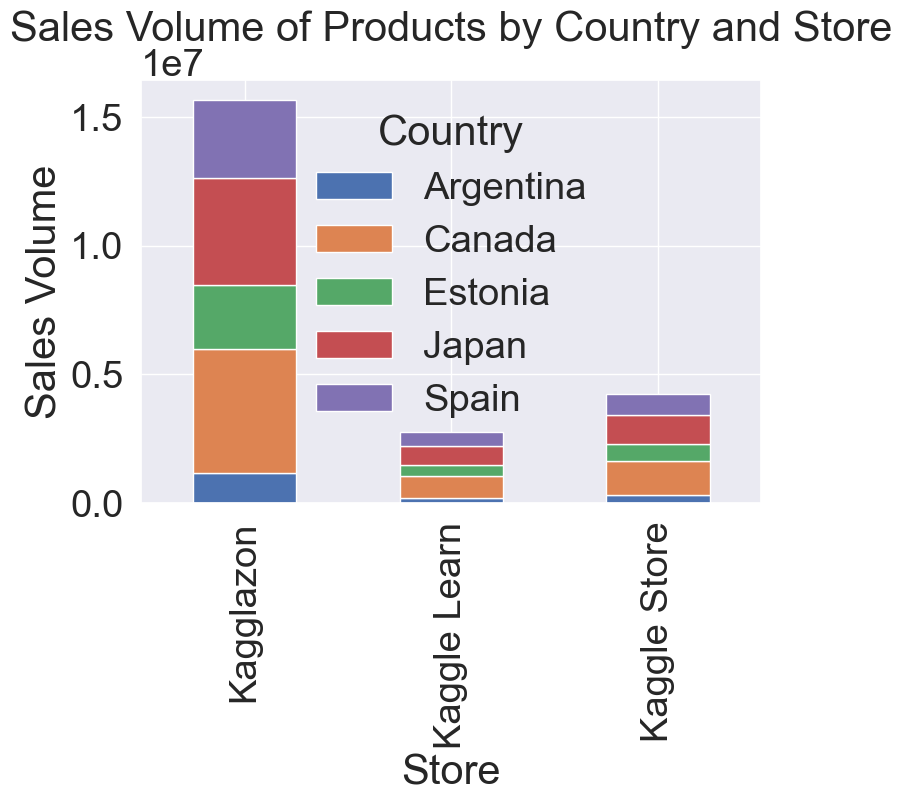

In [31]:
sales_by_country_store = df_train.groupby(['country', 'store', 'product'])['num_sold'].sum().reset_index()

# Pivot the data to get countries as columns, stores as rows, and sales as values
pivot_table = sales_by_country_store.pivot_table(index='store', columns='country', values='num_sold', aggfunc='sum')

# Plot the sales volume
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Store')
plt.ylabel('Sales Volume')
plt.title('Sales Volume of Products by Country and Store')
plt.legend(title='Country')
plt.show()

------ 아래부터는 필사로 따라하기

In [33]:
numerical_summary = df_train.describe()
numerical_summary

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [38]:
#Distribution of categorical variables
categorical_distribution = df_train.describe(include = ['object'])
categorical_distribution

,date,country,store,product,dayofweek
count,136950,136950,136950,136950,136950
unique,1826,5,3,5,7
top,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,sunday
freq,75,27390,45650,27390,19575
